# The Case of the Varying Vega

When trying to reproduce photometric calculations from the MKO filter curves documentation, I noticed I was off by a small amount. This demonstrates the source of the discrepancy.

It turns out that the special Vega model in HST CALSPEC was corrected downwards in the IR by about 2.5% relatively recently (i.e. since that documentation was written). The description on [the CALSPEC site](https://www.stsci.edu/hst/instrumentation/reference-data-for-calibration-and-tools/astronomical-catalogs/calspec) includes a mention in the change log for September 2019:

> There is one new WD, while Vega and Sirius change by 1-2%, because the correction for these highly saturated data is found to change with time (Bohlin, et al. 2019).

Past versions of their Vega model spectrum are available, so I plotted the fractional difference in each revision (i.e. from 1 to 2, 2 to 3, 3 to 4).

In [1]:
alpha_lyr_mod_001 = fits.open('https://archive.stsci.edu/hlsps/reference-atlases/cdbs/calspec/alpha_lyr_mod_001.fits')
alpha_lyr_mod_002 = fits.open('https://archive.stsci.edu/hlsps/reference-atlases/cdbs/calspec/alpha_lyr_mod_002.fits')
alpha_lyr_mod_003 = fits.open('https://archive.stsci.edu/hlsps/reference-atlases/cdbs/calspec/alpha_lyr_mod_003.fits')
alpha_lyr_mod_004 = fits.open('https://archive.stsci.edu/hlsps/reference-atlases/cdbs/calspec/alpha_lyr_mod_004.fits')

wl_001, flux_001 = alpha_lyr_mod_001[1].data['wavelength'], alpha_lyr_mod_001[1].data['flux']
wl_002, flux_002 = alpha_lyr_mod_002[1].data['wavelength'], alpha_lyr_mod_002[1].data['flux']
wl_003, flux_003 = alpha_lyr_mod_003[1].data['wavelength'], alpha_lyr_mod_003[1].data['flux']
wl_004, flux_004 = alpha_lyr_mod_004[1].data['wavelength'], alpha_lyr_mod_004[1].data['flux']
from scipy.interpolate import interp1d

flux_001_regrid = interp1d(wl_001, flux_001, bounds_error=False, fill_value=0.0)(wl_004)
flux_002_regrid = interp1d(wl_002, flux_002, bounds_error=False, fill_value=0.0)(wl_004)
flux_003_regrid = interp1d(wl_003, flux_003, bounds_error=False, fill_value=0.0)(wl_004)

/Users/jlong/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


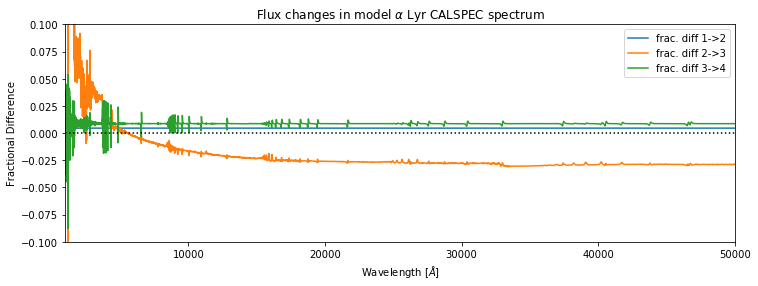

In [2]:
plt.figure(figsize=(12,4))
plt.plot(wl_004, (flux_002_regrid - flux_001_regrid)/flux_001_regrid, label='frac. diff 1->2')
plt.plot(wl_004, (flux_003_regrid - flux_002_regrid)/flux_002_regrid, label='frac. diff 2->3')
plt.plot(wl_004, (flux_004 - flux_003_regrid)/flux_003_regrid, label='frac. diff 3->4')
plt.xlim(1000, 50000)
plt.xlabel('Wavelength [$\\AA$]')
plt.ylabel('Fractional Difference')
plt.ylim(-.1,.1)
plt.title('Flux changes in model $\\alpha$ Lyr CALSPEC spectrum')
plt.legend()
plt.axhline(0, c='k', ls=':')